In [1]:
import matplotlib.pyplot as plt
from detecto.utils import read_image


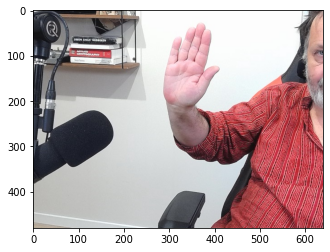

In [3]:
img = read_image('./images/training/hello-7d86b1fd-c20b-11ec-a7f3-14857f5ad353.jpg')

plt.imshow(img)
plt.show()

In [4]:
from detecto.core import Dataset

dataset = Dataset('./images/training')


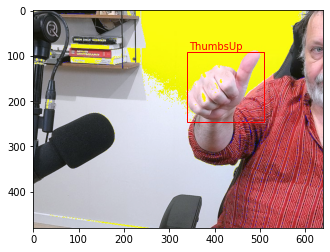

In [7]:
from detecto.visualize import show_labeled_image

image, targets = dataset[15]
show_labeled_image(image, targets['boxes'], targets['labels'])


## Create and train the model


In [8]:
from detecto.core import Model

model = Model(['FingersCrossed', 'Hello', 'ThumbsDown', 'ThumbsUp'])


In [9]:
model.fit(dataset)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:20<00:00,  5.03s/it]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:15<00:00,  4.73s/it]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:14<00:00,  4.68s/it]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:15<00:00,  4.69s/it]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:15<00:00,  4.70s/it]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:15<00:00,  4.70s/it]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:14<00:00,  4.67s/it]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:13<00:00,  4.57s/it]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:17<00:00,  4.85s/it]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 16/16 [01:18<00:00,  4.90s/it]


In [10]:
model.save('gesture_model.pth')

In [11]:
loaded_model = Model.load('gesture_model.pth', ['FingersCrossed', 'Hello', 'ThumbsDown', 'ThumbsUp'])


In [20]:
test_image = read_image('./images/test/thumbs_up-6903cedc-c20b-11ec-acf0-14857f5ad353.jpg')


In [21]:
labels, boxes, scores = model.predict(test_image)


In [14]:
print('Labels: ', labels)
print('Boxes: ', boxes)
print('Scores: ', scores)


Labels:  ['Hello', 'ThumbsDown', 'ThumbsDown', 'FingersCrossed', 'FingersCrossed', 'ThumbsDown', 'Hello', 'ThumbsUp', 'ThumbsUp', 'Hello', 'ThumbsUp', 'ThumbsUp', 'Hello', 'FingersCrossed', 'ThumbsUp', 'ThumbsDown', 'FingersCrossed', 'FingersCrossed', 'Hello']
Boxes:  tensor([[345.4260,  26.3845, 467.2538, 197.2630],
        [350.6544,  20.0723, 452.7614, 186.1686],
        [333.5396,   4.0811, 464.9854, 269.2338],
        [350.4149,  40.9118, 460.6348, 217.4274],
        [380.1555,   5.6446, 485.3517, 238.0739],
        [385.1009,  46.6408, 477.2096, 275.1302],
        [306.0071,   0.0000, 498.6288, 226.1082],
        [355.3648,   8.5538, 461.9335, 172.5782],
        [345.8159,  39.5561, 503.6931, 201.5401],
        [334.6615,  95.4938, 472.3544, 234.8688],
        [336.0195,  20.3025, 432.2286, 232.6564],
        [340.4257,  63.8891, 474.7375, 278.9575],
        [381.2296,  40.4319, 478.8629, 264.4903],
        [358.6369,  87.4968, 474.2987, 285.2293],
        [316.2211,  96.3659, 48

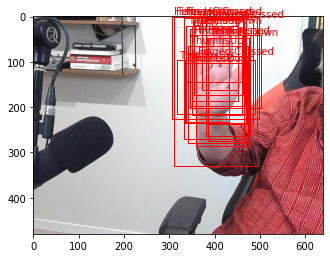

In [15]:
show_labeled_image(test_image, boxes, labels)


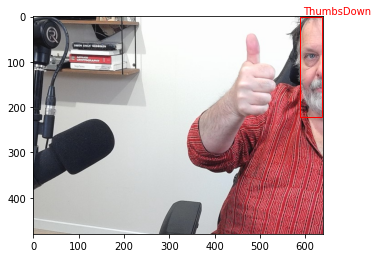

In [22]:
show_labeled_image(test_image, boxes[0], labels[0])
